In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sampleSubmission.csv', 'test.csv']


In [2]:
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
combine = [train_df,test_df]

In [4]:
train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [6]:
train_df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [7]:
for dataset in combine:
    dataset.loc[dataset['Wilderness_Area1']==1, 'WildernessArea'] = 1
    dataset.loc[dataset['Wilderness_Area2']==1, 'WildernessArea'] = 2
    dataset.loc[dataset['Wilderness_Area3']==1, 'WildernessArea'] = 3
    dataset.loc[dataset['Wilderness_Area4']==1, 'WildernessArea'] = 4
train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,WildernessArea
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1.0
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1.0
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1.0
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1.0


In [8]:
for dataset in combine:
    dataset['WildernessArea'] = dataset['WildernessArea'].astype(int)

In [9]:
train_df = train_df.drop(['Wilderness_Area1'], axis=1)
train_df = train_df.drop(['Wilderness_Area2'], axis=1)
train_df = train_df.drop(['Wilderness_Area3'], axis=1)
train_df = train_df.drop(['Wilderness_Area4'], axis=1)
test_df  = test_df.drop(['Wilderness_Area1'], axis=1)
combine = [train_df,test_df]

In [10]:
test_df  = test_df.drop(['Wilderness_Area2'], axis=1)
test_df  = test_df.drop(['Wilderness_Area3'], axis=1)
test_df  = test_df.drop(['Wilderness_Area4'], axis=1)
combine = [train_df,test_df]

In [11]:
for dataset in combine:
    for i in range (1,41):
        
        dataset.loc[dataset['Soil_Type'+str(i)] == 1 ,'Soil_Type'] = i
    dataset['Soil_Type'] = dataset['Soil_Type'].astype(int)

In [12]:
for dataset in combine:
    for i in range(1,41):
        train_df = train_df.drop(['Soil_Type'+str(i)], axis=1)
        test_df  = test_df.drop(['Soil_Type'+str(i)], axis=1)
combine = [train_df,test_df]

KeyError: "['Soil_Type1'] not found in axis"

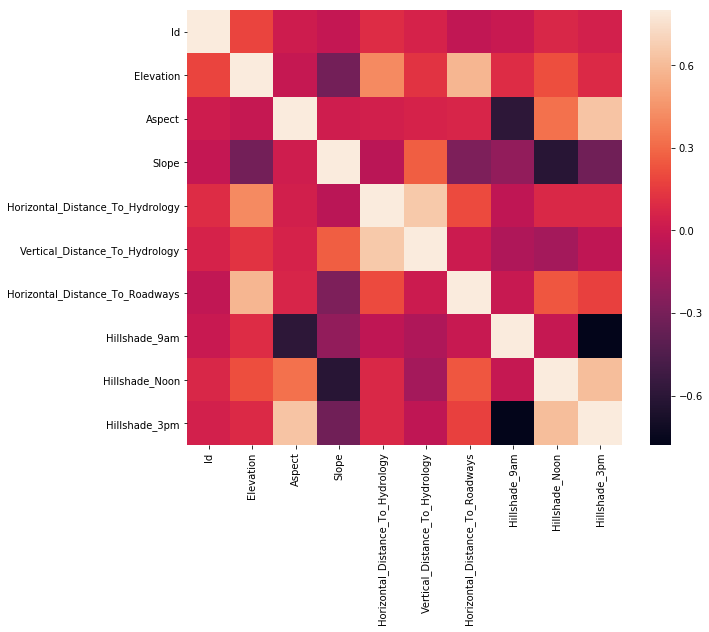

In [13]:
size = 10
corrmatrix = train_df.iloc[:,:size].corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,vmax=0.8,square=True);



In [14]:
data = train_df.iloc[:,:size]
cols = data.columns

data_corr = data.corr()

threshold = 0.5

corr_list=[]


In [15]:
data_corr

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887
Horizontal_Distance_To_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833
Vertical_Distance_To_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559
Horizontal_Distance_To_Roadways,-0.033028,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882
Hillshade_9am,0.000786,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965
Hillshade_Noon,0.073123,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526
Hillshade_3pm,0.042524,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000


In [16]:
for i in range (0,size):
    for j in range (i+1,size):
        if data_corr.iloc[i,j]>=threshold and data_corr.iloc[i,j]<1 or data_corr.iloc[i,j]<0 and data_corr.iloc[i,j]<= - threshold:
            corr_list.append([data_corr.iloc[i,j],i,j])
        

In [17]:
s_corr_list=sorted(corr_list,key=lambda x: -abs(x[0]))
for v,i,j in s_corr_list:
    print("%s and %s = %.2f" % (cols[i], cols[j], v))

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


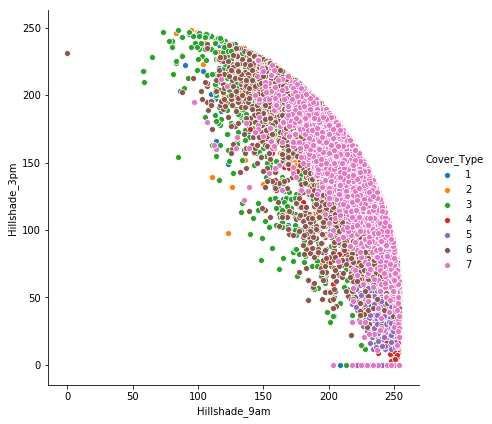

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


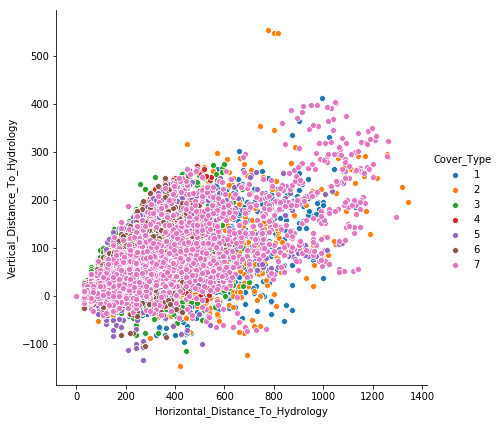

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


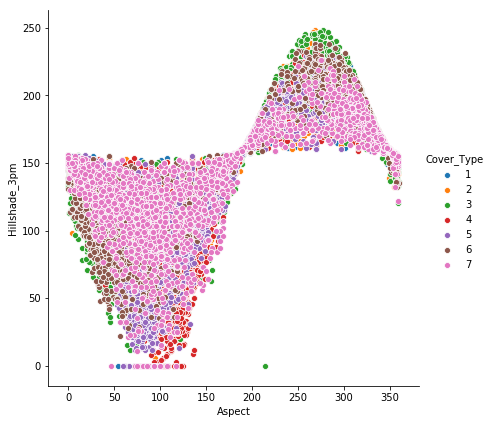

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


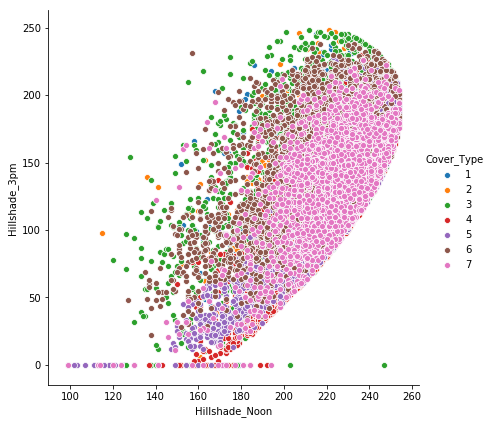

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


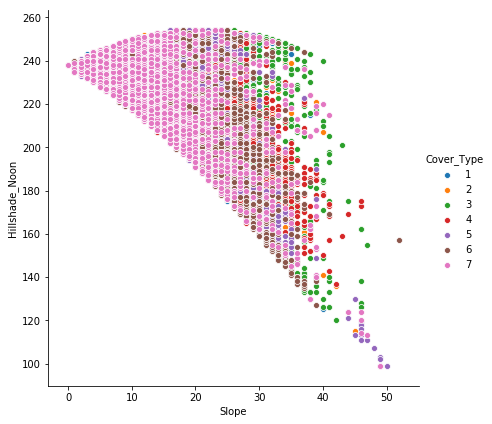

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


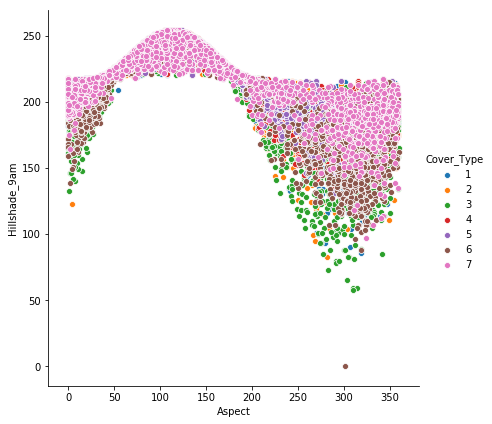

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


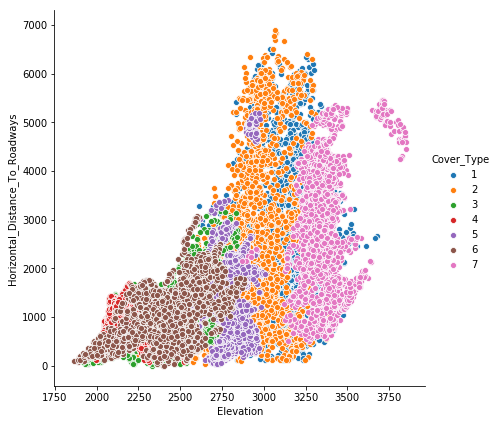

In [18]:
for v,i,j in s_corr_list:
    sns.pairplot(data= train_df, hue = 'Cover_Type', size = 6, x_vars=cols[i], y_vars=cols[j])
    plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


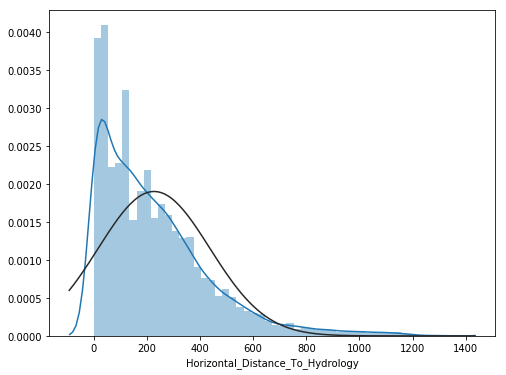

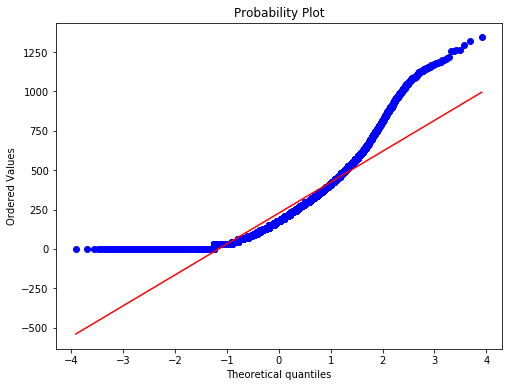

In [19]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(train_df['Horizontal_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(train_df['Horizontal_Distance_To_Hydrology'], plot=plt)

In [20]:
train_df['Horizontal_Distance_To_Hydrology'] = np.sqrt(train_df['Horizontal_Distance_To_Hydrology'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


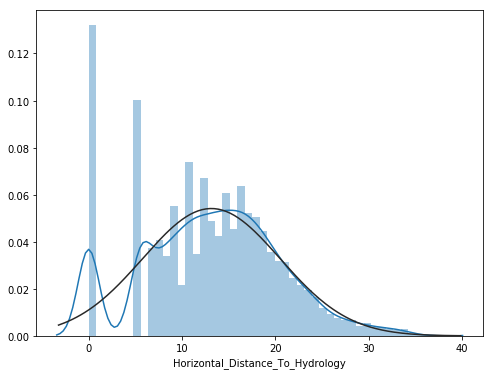

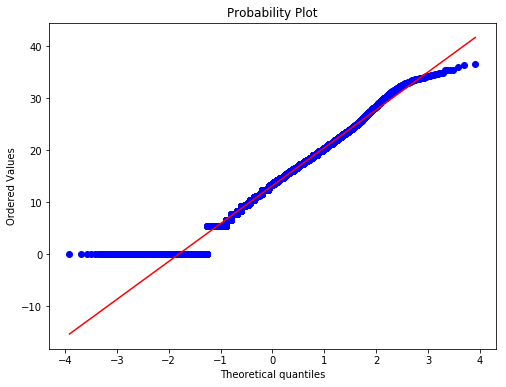

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Horizontal_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(train_df['Horizontal_Distance_To_Hydrology'], plot=plt)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


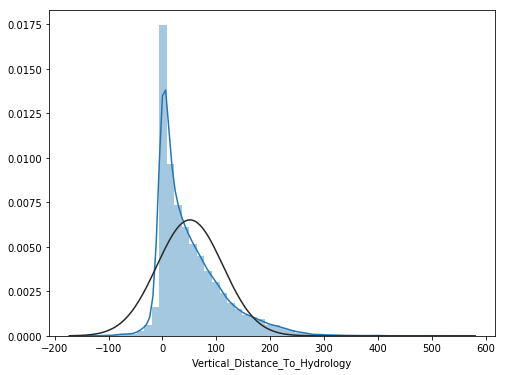

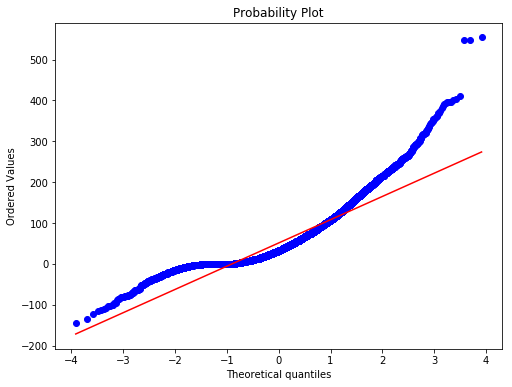

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Vertical_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(train_df['Vertical_Distance_To_Hydrology'], plot=plt)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


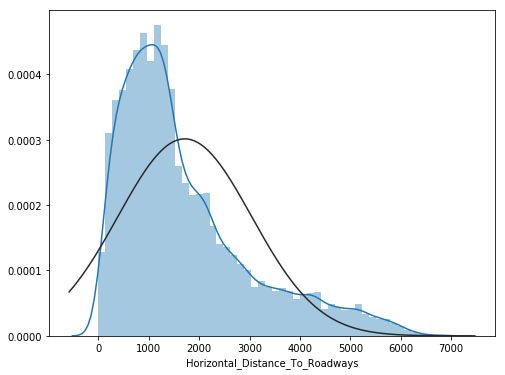

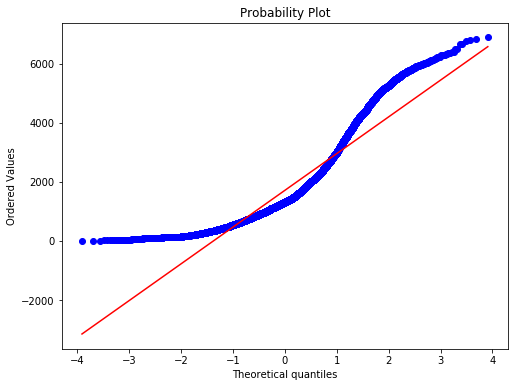

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Horizontal_Distance_To_Roadways'], fit=stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(train_df['Horizontal_Distance_To_Roadways'], plot=plt)

In [24]:
train_df['Horizontal_Distance_To_Roadways'] = np.sqrt(train_df['Horizontal_Distance_To_Roadways'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


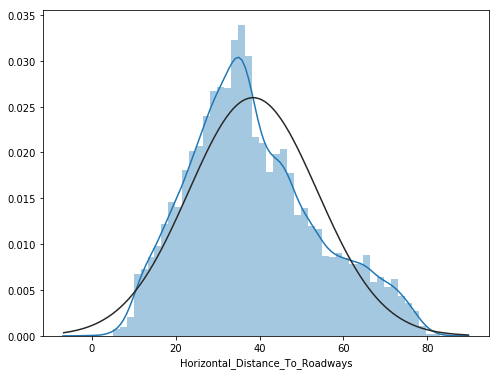

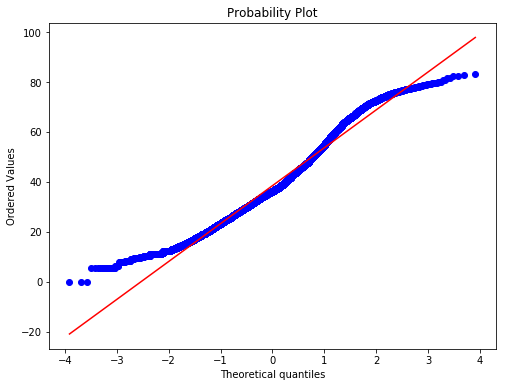

In [25]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Horizontal_Distance_To_Roadways'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(train_df['Horizontal_Distance_To_Roadways'], plot=plt)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


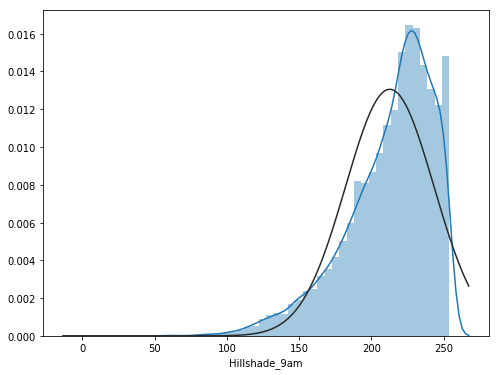

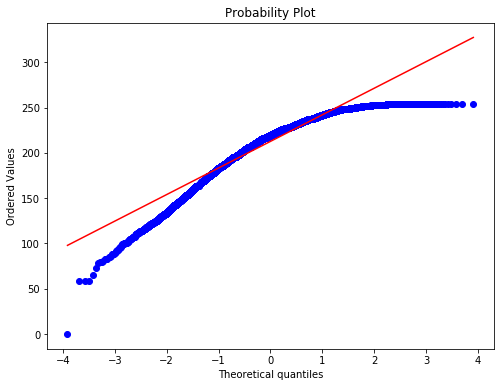

In [26]:
fig = plt.figure(figsize=(8,6))
sns.distplot(train_df['Hillshade_9am'],fit=stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(train_df['Hillshade_9am'],plot=plt)

In [27]:
train_df['Hillshade_9am'] = np.square(train_df['Hillshade_9am'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


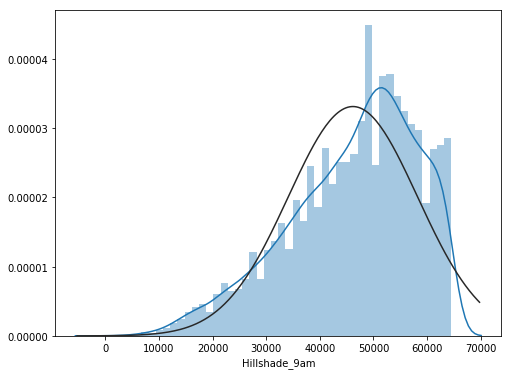

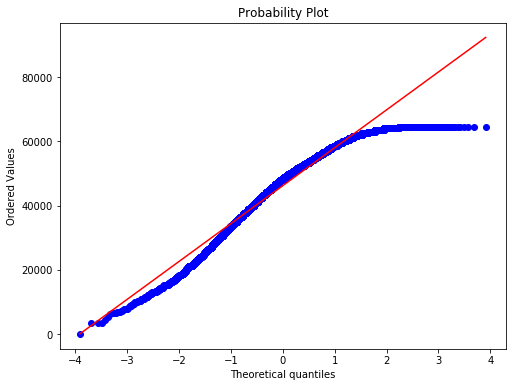

In [28]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Hillshade_9am'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(train_df['Hillshade_9am'], plot=plt)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


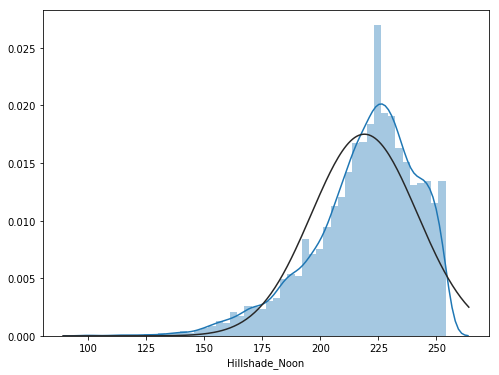

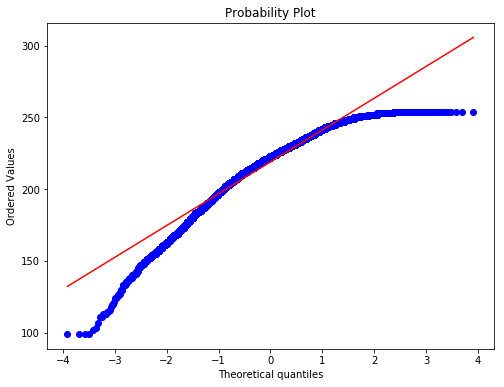

In [29]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Hillshade_Noon'],fit=stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(train_df['Hillshade_Noon'],plot=plt)

In [30]:
train_df['Hillshade_Noon'] = np.sqrt(train_df['Hillshade_Noon'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


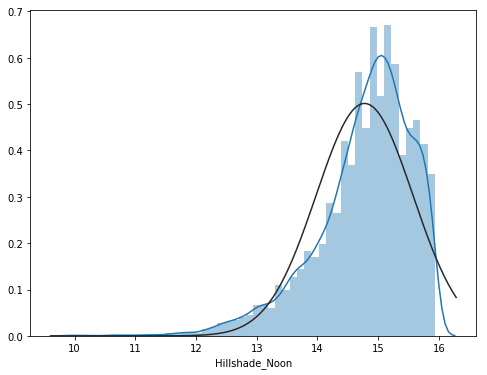

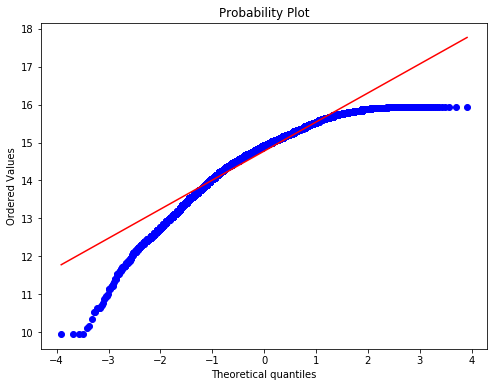

In [31]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Hillshade_Noon'],fit=stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(train_df['Hillshade_Noon'],plot=plt)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


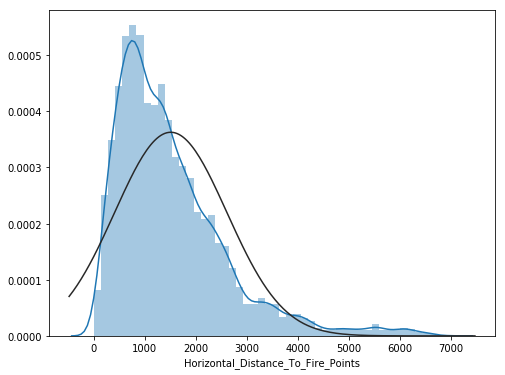

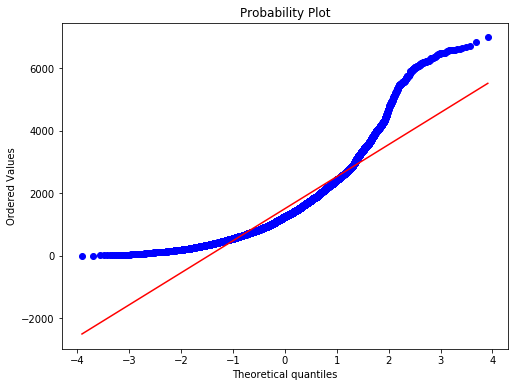

In [32]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Horizontal_Distance_To_Fire_Points'], fit=stats.norm)
plt.figure(figsize=(8,6))
res = stats.probplot(train_df['Horizontal_Distance_To_Fire_Points'],plot=plt)

In [33]:
train_df['Horizontal_Distance_To_Fire_Points'] = np.sqrt(train_df['Horizontal_Distance_To_Fire_Points'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


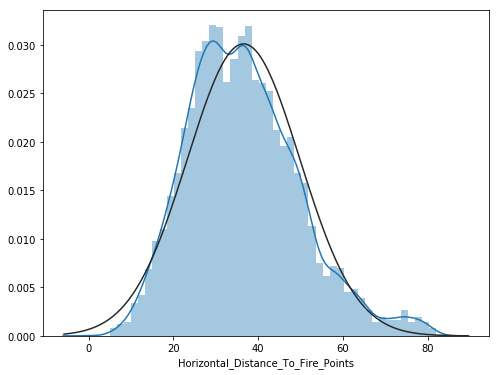

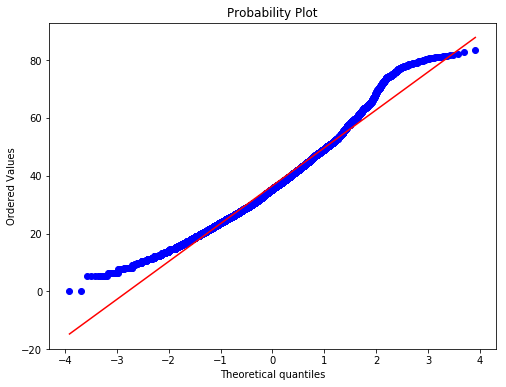

In [34]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Horizontal_Distance_To_Fire_Points'], fit=stats.norm)
plt.figure(figsize=(8,6))
res = stats.probplot(train_df['Horizontal_Distance_To_Fire_Points'],plot=plt)

In [35]:
train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,WildernessArea,Soil_Type
0,1,2596,51,3,16.062378,0,22.583180,48841,15.231546,148,79.240141,5,1,29
1,2,2590,56,2,14.560220,-6,19.748418,48400,15.329710,151,78.898669,5,1,29
2,3,2804,139,9,16.370706,65,56.391489,54756,15.427249,135,78.236820,2,1,12
3,4,2785,155,18,15.556349,118,55.587768,56644,15.427249,122,78.809898,2,1,30
4,5,2595,45,2,12.369317,-1,19.773720,48400,15.297059,150,78.562077,5,1,29


In [36]:
train_df["Hillshade9*Hillshade3"]  = train_df["Hillshade_9am"]*train_df["Hillshade_3pm"]

In [37]:
test_df["Hillshade9*Hillshade3"] =  test_df["Hillshade_9am"]*test_df["Hillshade_3pm"]
combine = [train_df,test_df]

In [38]:
train_df["Hillshade9*aspect"]  = train_df["Hillshade_9am"]*train_df["Aspect"]
test_df["Hillshade9*aspect"] =  test_df["Hillshade_9am"]*test_df["Aspect"]

train_df["Hillshadenoon*slope"]  = train_df["Hillshade_Noon"]*train_df["Slope"]
test_df["Hillshadenoon*slope"] =  test_df["Hillshade_Noon"]*test_df["Slope"]

train_df["Hillshade3*aspect"]  = train_df["Hillshade_3pm"]*train_df["Aspect"]
test_df["Hillshade3*aspect"] =  test_df["Hillshade_3pm"]*test_df["Aspect"]

train_df["Horizontal*Vertical"]  = train_df["Horizontal_Distance_To_Hydrology"]*train_df["Vertical_Distance_To_Hydrology"]
test_df["Horizontal*Vertical"] =  test_df["Horizontal_Distance_To_Hydrology"]*test_df["Vertical_Distance_To_Hydrology"]

train_df["Hillshadenoon*Hillshade3"]  = train_df["Hillshade_Noon"]*train_df["Hillshade_3pm"]
test_df["Hillshadenoon*Hillshade3"] =  test_df["Hillshade_Noon"]*test_df["Hillshade_3pm"]

train_df["Horizontal*Roadways"]  = train_df["Horizontal_Distance_To_Hydrology"]*train_df["Horizontal_Distance_To_Roadways"]
test_df["Horizontal*Roadways"] =  test_df["Horizontal_Distance_To_Hydrology"]*test_df["Horizontal_Distance_To_Roadways"]

combine = [train_df,test_df]

In [39]:
X_train = train_df.drop("Cover_Type", axis=1)
Y_train = train_df["Cover_Type"]
X_test  = test_df.drop("Id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((15120, 20), (15120,), (565892, 19))

In [40]:
X_train = X_train.drop("Id",axis=1)

In [41]:
X_train.shape, Y_train.shape, X_test.shape

((15120, 19), (15120,), (565892, 19))

In [42]:
from sklearn.decomposition import PCA, TruncatedSVD
pca = PCA(n_components = 2, whiten= True )  # whitten = normalize
x_pca = pca.fit_transform(X_train)
print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.86670413 0.13327198]
sum:  0.9999761158099079


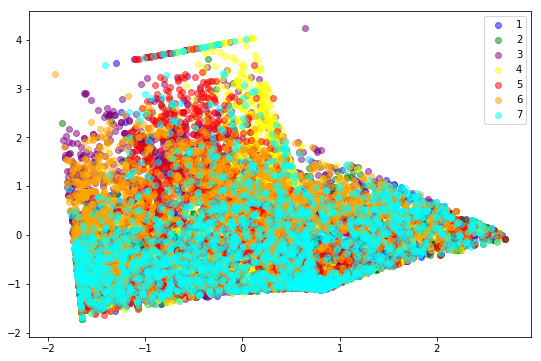

In [43]:
df = pd.DataFrame(np.stack([x_pca[:,0], x_pca[:,1], Y_train], axis=1), columns=["p1", "p2", "Cover_Type"])
color = ["blue", "green", "purple", "yellow", "red", "orange", "cyan"]
plt.figure(1,figsize=(9,6))
for each in set(Y_train.unique()):
    plt.scatter(df.p1[df.Cover_Type == each],df.p2[df.Cover_Type == each],color = color[each - 1],label = each, alpha=0.5)
plt.legend()
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=42)
clf.fit(x_train, y_train)

y_predicted = clf.predict(x_val)

In [46]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

In [47]:
accuracy, precision, recall, f1 = get_metrics(y_val, y_predicted)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.854, precision = 0.852, recall = 0.854, f1 = 0.851


In [48]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=300, learning_rate=0.3, max_depth=5,n_jobs=-1, seed=42, objective="multi:softmax")
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_val)
accuracy, precision, recall, f1 = get_metrics(y_val, y_predicted)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.857, precision = 0.855, recall = 0.857, f1 = 0.855


In [49]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(n_estimators=300, learning_rate=0.3, max_depth=5, n_jobs=-1, seed=42, objective="multi:softmax")
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_val)
accuracy, precision, recall, f1 = get_metrics(y_val, y_predicted)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.856, precision = 0.854, recall = 0.856, f1 = 0.854


In [50]:
data_test = pd.read_csv("../input/test.csv")
data_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [51]:
clf = XGBClassifier(n_estimators=300, learning_rate=0.3, max_depth=5,n_jobs=-1, seed=42, objective="multi:softmax")
clf.fit(X_train, Y_train)
test_preds = clf.predict(X_test)

output = pd.DataFrame({'Id': data_test.Id,
                       'Cover_Type': test_preds})
output.to_csv('submission.csv', index=False)